In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.cloud import bigquery
from google.cloud import bigquery_storage

In [ ]:
# Path to service account JSON (or set GOOGLE_APPLICATION_CREDENTIALS env var)
SERVICE_ACCOUNT = "D:/My_Projects/olist-ecommerce-1234321-925167414fbb.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = SERVICE_ACCOUNT

# Initialize clients
client = bigquery.Client()
bqstorage_client = bigquery_storage.BigQueryReadClient()

# Replace with your project.dataset.table or a SQL query
QUERY = """
SELECT *
FROM `olist-ecommerce-1234321.rawdata.geolocation`
"""

# Run query and download to DataFrame (fast via BigQuery Storage API)
job = client.query(QUERY)
df = job.result().to_dataframe(bqstorage_client=bqstorage_client)

# Inspect and save
print(df.head())
output_path = r"D:\My_Projects\OLIST\python\data\staging\geolocation.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False)
print("Saved to", output_path)

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  
Saved to D:\My_Projects\OLIST\python\data\staging\geolocation.csv


In [12]:
df.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

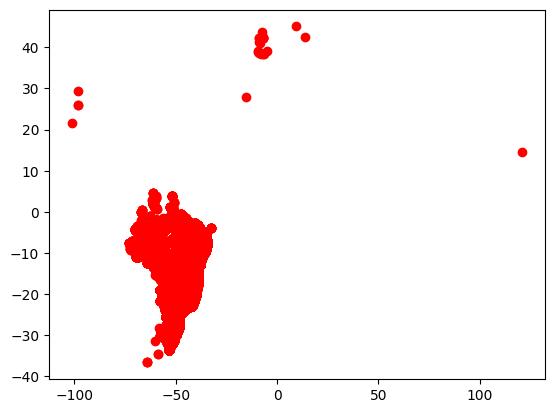

In [14]:
plt.plot(df['geolocation_lng'], df['geolocation_lat'], 'ro') 